In [3]:
!pip install catboost xgboost scikit-learn matplotlib seaborn joblib pandas numpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 9.3 MB/s eta 0:00:00


In [4]:
# Импортируем стандартные библиотеки

import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

# Импортируем класс линейной регрессии из библиотеки scikit-learn
from sklearn.linear_model import LinearRegression

# Функция для разделения данных на обучающую и тестовую выборки
from sklearn.model_selection import train_test_split

# Импорт модели случайного леса для задачи регрессии.
# RandomForestRegressor — это ансамблевая модель, которая объединяет множество решающих деревьев.
# Она хорошо работает при наличии нелинейных зависимостей и устойчиво справляется с переобучением.
from sklearn.ensemble import RandomForestRegressor

# Импорт функции для разделения выборки на обучающую и тестовую части.
# train_test_split помогает случайным образом разбить данные на тренировочные и тестовые,
# чтобы можно было обучить модель и оценить её качество на "новых" данных.
from sklearn.model_selection import train_test_split

# Генерация полиномиальных и перекрёстных признаков (например, x², x1*x2 и т.д.) для учёта нелинейных зависимостей
from sklearn.preprocessing import PolynomialFeatures

# Заполнение пропущенных значений в данных (например, средним, медианой или наиболее частым значением)
from sklearn.impute import SimpleImputer

# KNN
from sklearn.neighbors import KNeighborsRegressor

# Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor

# HistGradient Boosting
from sklearn.ensemble import HistGradientBoostingRegressor

# AdaBoostRegressor
from sklearn.ensemble import  AdaBoostRegressor

# XGBoost
from xgboost import XGBRegressor

# CatBoost
from catboost import CatBoostRegressor

# Метрики для оценки качества модели:
# - среднеквадратичная ошибка (MSE)
# - коэффициент детерминации (R²)
# - средняя абсолютная ошибка (MAE)
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


In [5]:
# === Загружаем Датасет ===
df = pd.read_excel("/content/sample_data/1.xlsx")
df = df.drop_duplicates()
print(f"Размерность набора данных: {df.shape}")
display(df.head())
df.info()

# Альтернативный способ загрузки данных для ментора, если возникают проблемы с загрузкой файла
# Excel = 'https://lms.skillfactory.ru/asset-v1:SkillFactory+MIFIML-2sem+2025+type@asset+block@%D0%94%D0%B0%D0%BD%D0%BD%D1%8B%D0%B5_%D0%B4%D0%BB%D1%8F_%D0%BA%D1%83%D1%80%D1%81%D0%BE%D0%B2%D0%BE%D0%B8__%D0%9A%D0%BB%D0%B0%D1%81%D1%81%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%BE%D0%B5_%D0%9C%D0%9E.xlsx'
# df = pd.read_excel(Excel)

Размерность набора данных: (1001, 214)


,Unnamed: 0,"IC50, mM","CC50, mM",SI,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,0,6.239374,175.482382,28.125000,5.094096,5.094096,0.387225,0.387225,0.417362,42.928571,...,0,0,0,0,0,0,0,0,3,0
1,1,0.771831,5.402819,7.000000,3.961417,3.961417,0.533868,0.533868,0.462473,45.214286,...,0,0,0,0,0,0,0,0,3,0
2,2,223.808778,161.142320,0.720000,2.627117,2.627117,0.543231,0.543231,0.260923,42.187500,...,0,0,0,0,0,0,0,0,3,0
3,3,1.705624,107.855654,63.235294,5.097360,5.097360,0.390603,0.390603,0.377846,41.862069,...,0,0,0,0,0,0,0,0,4,0
4,4,107.131532,139.270991,1.300000,5.150510,5.150510,0.270476,0.270476,0.429038,36.514286,...,0,0,0,0,0,0,0,0,0,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Columns: 214 entries, Unnamed: 0 to fr_urea
dtypes: float64(107), int64(107)
memory usage: 1.6 MB


In [6]:
RANDOM_STATE = 123

In [7]:
target = 'IC50, mM'
X = df.drop(['Unnamed: 0','IC50, mM', 'CC50, mM', 'SI'], axis=1) # Удаляем целевую и связанные переменные
y = df[target]

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE)

model = RandomForestRegressor(n_estimators=100, random_state=RANDOM_STATE)
model.fit(X_train, y_train)

feature_importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)

In [9]:
print("Топ-10 дескрипторов для IC50:")
feature_importances.head(10)

Топ-10 дескрипторов для IC50:


,0
BCUT2D_MWLOW,0.187558
VSA_EState4,0.056110
Chi1n,0.049614
Kappa2,0.032389
BCUT2D_MRLOW,0.026263
Chi4v,0.022165
MinEStateIndex,0.019823
FpDensityMorgan1,0.017069
EState_VSA5,0.016864
Chi1v,0.016481


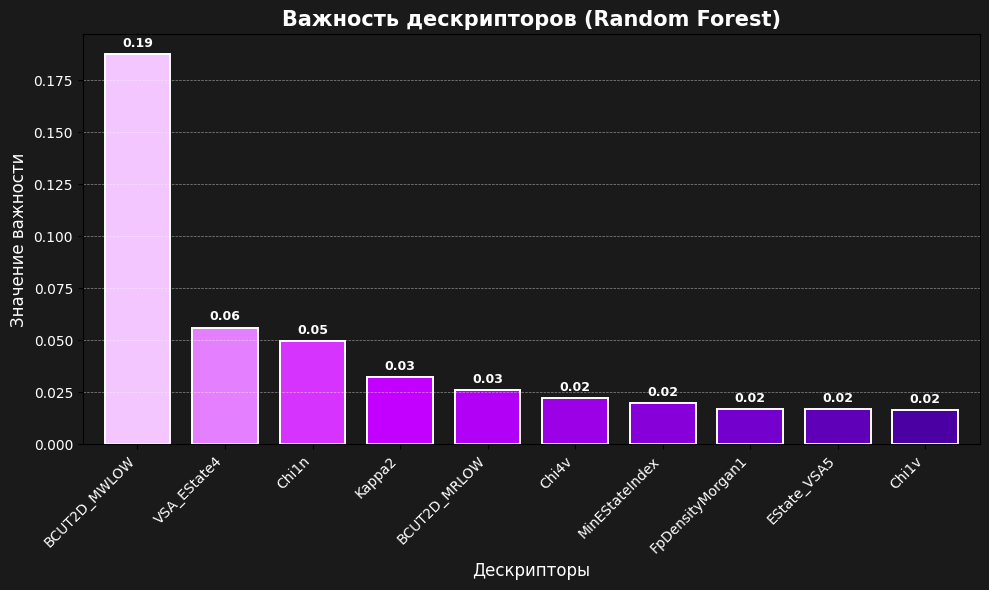

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Неоново-фиолетовая палитра (насыщенные яркие оттенки, вручную подобранные)
neon_purples_bright = [
    '#f3c6ff', '#e480ff', '#d633ff', '#c300ff', '#b100f5',
    '#9b00e6', '#8700d9', '#7300cc', '#5f00b8', '#4b00a3'
]

# Увеличим размер графика
plt.figure(figsize=(10, 6))

# Построение диаграммы с яркой палитрой
ax = feature_importances.head(10).plot(
    kind='bar',
    width=0.75,
    color=neon_purples_bright,
    alpha=1,
    edgecolor='#ffffff',  # белая окантовка для "светящегося" эффекта
    linewidth=1.4
)

# Текстовые подписи над столбцами (с белым неоновым шрифтом)
for i, v in enumerate(feature_importances.head(10)):
    ax.text(i, v + 0.002, f"{v:.2f}",
            ha='center', va='bottom',
            fontsize=9, fontweight='bold', color='white')

# Тёмный фон для клубного стиля
ax.set_facecolor('#1a1a1a')            # фон области графика
plt.gcf().set_facecolor('#1a1a1a')     # фон всей фигуры

# Оформление текста и сетки
plt.title('Важность дескрипторов (Random Forest)',
          fontsize=15, fontweight='bold', color='white')
plt.ylabel('Значение важности', fontsize=12, color='white')
plt.xlabel('Дескрипторы', fontsize=12, color='white')
plt.xticks(rotation=45, ha='right', fontsize=10, color='white')
plt.yticks(fontsize=10, color='white')
plt.grid(axis='y', linestyle='--', linewidth=0.5,
         alpha=0.5, color='white')

# Оптимизация расположения
plt.tight_layout()
plt.show()

**Ось X:** **Названия молекулярных дескрипторов**

Это характеристики молекул, рассчитанные с помощью специализированных библиотек (например, RDKit, Mordred).

*Они описывают молекулы с разных сторон:* геометрия, электронные свойства, топология, распределение заряда и т.д.

**Например:**

**BCUT2D_MWHLOW** — один из BCUT-дескрипторов, связанный с молекулярной массой (MW) и низкими энергетическими уровнями.

**VSA_Estate4, Estate_VSA5** — дескрипторы, объединяющие площадь поверхности (VSA) и электростатические индексы (Estate).

**Chi1n, Chi4v, Chi1v** — топологические индексы Кьера, отражающие степень разветвлённости молекулы.

**FpDensityMorgan1** — плотность отпечатков Morgan (то есть, фрагментная структура молекулы).

📌 **Ось Y:** **Значение важности**

Это числовая метрика от модели Random Forest, которая показывает, насколько сильно каждый дескриптор влияет на предсказание целевого признака (например, активности соединений, IC₅₀ и др.).

Чем выше значение — тем более информативен дескриптор для модели.



In [11]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.impute import SimpleImputer

In [12]:
# Data Engineering:  Исключаем ненужные столбцы
cols_to_exclude = ['IC50, mM', 'CC50, mM', 'SI']
X = df.drop(columns=[col for col in cols_to_exclude if col in df.columns], errors='ignore')
y = df[target]

df_regress = X.copy()

# Добавим новые признаки молярный
df_regress['MolLogP_MolWt'] = df_regress['MolLogP'] * df_regress['MolWt']

In [13]:
# Полиномиальные признаки
existing_poly_cols = [col for col in ['MolLogP', 'MolWt'] if col in df_regress.columns]

In [14]:
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(df_regress[existing_poly_cols])
poly_feature_names = poly.get_feature_names_out(existing_poly_cols)

new_poly_df = pd.DataFrame(poly_features, columns=poly_feature_names, index=df_regress.index)
for col in new_poly_df.columns:
   if col not in df_regress.columns:
       df_regress[col] = new_poly_df[col]

In [15]:
df_regress['MolLogP_gt_3'] = (df_regress['MolLogP'] > 3).astype(int)

In [16]:
imputer = SimpleImputer(strategy='median')
df_regress = pd.DataFrame(imputer.fit_transform(df_regress), columns=df_regress.columns)

In [17]:
print("Получили новые признаки:", [col for col in df_regress.columns if col not in df.columns])

Получили новые признаки: ['MolLogP_MolWt', 'MolLogP^2', 'MolLogP MolWt', 'MolWt^2', 'MolLogP_gt_3']


In [18]:
X_train, X_test, y_train, y_test = train_test_split(df_regress, y, test_size=0.2, random_state=RANDOM_STATE)

# **KNN (K-Nearest Neighbors)**
Метод, который ищет K ближайших объектов в обучающей выборке и делает предсказание на основе их значений.








In [19]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [20]:
results = []
best_r2 = 0
best_model = ''

In [21]:
model = KNeighborsRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
res = {'Model':'KNN',  'MSE':mse,  'RMSE': rmse, 'MAE':mae, 'r2': r2}
results.append(res)


**Random Forest**

In [22]:
model = RandomForestRegressor(random_state=RANDOM_STATE)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
res = {'Model':'Random Forest',  'MSE':mse,  'RMSE': rmse, 'MAE':mae, 'r2': r2}
results.append(res)

**Gradient Boosting**

In [23]:
from sklearn.ensemble import GradientBoostingRegressor

In [24]:
model = GradientBoostingRegressor(random_state=RANDOM_STATE)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
res = {'Model':'Gradient Boosting',  'MSE':mse,  'RMSE': rmse, 'MAE':mae, 'r2': r2}
results.append(res)

**HistGradientBoosting**

In [25]:
from sklearn.ensemble import HistGradientBoostingRegressor

In [26]:
model = HistGradientBoostingRegressor(random_state=RANDOM_STATE)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
res = {'Model':'HistGradientBoosting',  'MSE':mse,  'RMSE': rmse, 'MAE':mae, 'r2': r2}
results.append(res)

**AdaBoostRegressor**

In [27]:
from sklearn.ensemble import  AdaBoostRegressor

In [28]:
model = AdaBoostRegressor(random_state=RANDOM_STATE)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
res = {'Model':'AdaBoostRegressor',  'MSE':mse,  'RMSE': rmse, 'MAE':mae, 'r2': r2}
results.append(res)

**XGBoost**

In [29]:
from xgboost import XGBRegressor

In [30]:
model = XGBRegressor(random_state=RANDOM_STATE)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
res = {'Model':'XGBoost',  'MSE':mse,  'RMSE': rmse, 'MAE':mae, 'r2': r2}
results.append(res)

 **CatBoost**

In [31]:
from catboost import CatBoostRegressor

In [32]:
model = CatBoostRegressor(random_state=RANDOM_STATE, verbose=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
res = {'Model':'CatBoost',  'MSE':mse,  'RMSE': rmse, 'MAE':mae, 'r2': r2}
results.append(res)

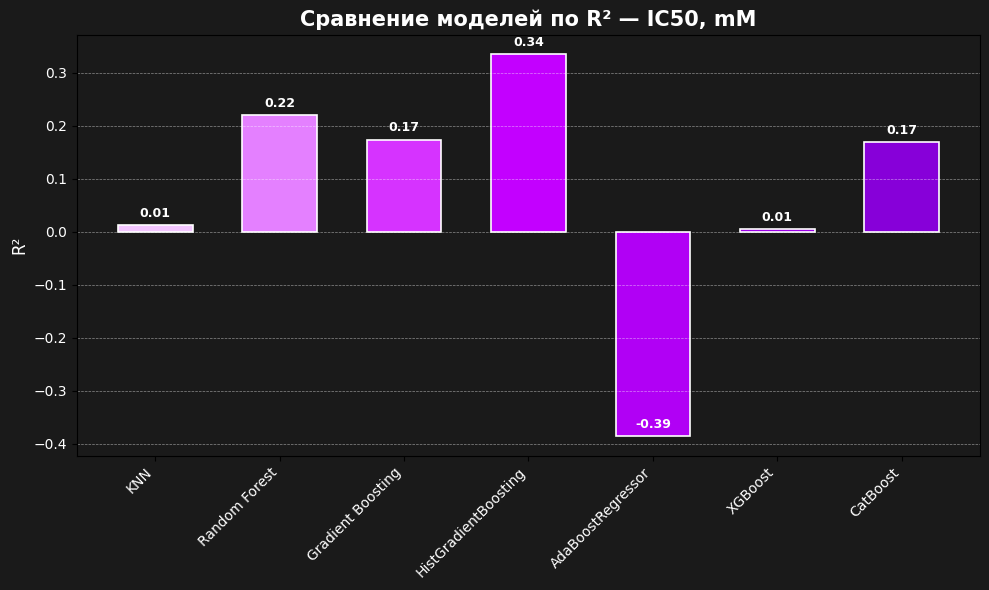

In [33]:
# Яркая неоново-фиолетовая палитра (10 оттенков)
neon_purples_bright = [
    '#f3c6ff', '#e480ff', '#d633ff', '#c300ff', '#b100f5',
    '#9b00e6', '#8700d9', '#7300cc', '#5f00b8', '#4b00a3'
]

# Преобразуем результаты в датафрейм
results_df = pd.DataFrame(results)

# Построение графика
plt.figure(figsize=(10, 6))
bars = plt.bar(
    results_df['Model'],
    results_df['r2'],
    width=0.6,
    color=neon_purples_bright[:len(results_df)],  # подбираем нужное количество цветов
    edgecolor='white',
    linewidth=1.2
)

# Подписи над столбцами
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2,
             height + 0.01,
             f"{height:.2f}",
             ha='center', va='bottom',
             fontsize=9, color='white', fontweight='bold')

# Оформление в неоновом стиле
plt.title(f'Сравнение моделей по R² — {target}', fontsize=15, fontweight='bold', color='white')
plt.xticks(rotation=45, ha='right', fontsize=10, color='white')
plt.yticks(fontsize=10, color='white')
plt.ylabel('R²', fontsize=12, color='white')
plt.grid(axis='y', linestyle='--', linewidth=0.5, alpha=0.5, color='white')

# Фон в неоновом стиле
plt.gca().set_facecolor('#1a1a1a')     # фон области графика
plt.gcf().set_facecolor('#1a1a1a')     # фон всей фигуры

plt.tight_layout()
plt.show()


* **HistGradientBoosting** показал наилучшее значение R² = 0.34 — модель лучше всех объясняет дисперсию значений IC₅₀.

* **Random Forest, Gradient Boosting и CatBoost** продемонстрировали положительные R² (0.17–0.22) — умеренная, но стабильная предсказательная способность.
* **KNN и XGBoost** дали очень низкие значения R² (~0.01) — практически не уловили зависимости.

* **AdaBoostRegressor** показал отрицательное значение R² = -0.39 — работает хуже, чем простое усреднение.

**Общий вывод**
Алгоритмы градиентного бустинга, особенно HistGradientBoosting, наиболее эффективны при предсказании IC₅₀ на основе молекулярных дескрипторов.
Методы вроде KNN и AdaBoost показали слабую устойчивость и низкую точность в данной задаче.

In [34]:
print(f"Результаты моделей (таргет: {target}):")

results_df

Результаты моделей (таргет: IC50, mM):


,Model,MSE,RMSE,MAE,r2
0,KNN,141572.045065,376.260608,225.628585,0.012167
1,Random Forest,111768.740873,334.318323,194.204800,0.220123
2,Gradient Boosting,118481.640735,344.211622,195.888401,0.173283
3,HistGradientBoosting,95274.069624,308.664980,191.231119,0.335216
4,AdaBoostRegressor,198698.722474,445.756349,371.003872,-0.386440
5,XGBoost,142558.931675,377.569771,197.890063,0.005281
6,CatBoost,119182.138803,345.227662,189.800134,0.168395


Выводы по результатам регрессионного моделирования (предсказание IC₅₀, mM)
* **HistGradientBoosting** показал лучшие результаты по всем ключевым метрикам:

Наименьшие ошибки:

**MSE** = 95,274
**RMSE** = 308.66
**MAE** = 191.23

Наивысшее качество предсказаний: **R²** = 0.335

* **Random Forest, Gradient Boosting и CatBoost** также показали стабильные значения:

R² в диапазоне 0.17–0.22, ошибки — умеренные.

CatBoost дал наименьшее MAE среди всех моделей (189.80), несмотря на более высокую RMSE.

* **KNN и XGBoost** показали низкие R² (~0.01 и 0.005) — предсказательная способность крайне слабая.

Ошибки остаются довольно высокими (RMSE > 370)

* **AdaBoostRegressor** оказался наименее эффективным:

Самый высокий уровень ошибок: RMSE = 445.76, MAE = 371.00

Отрицательное значение R² = –0.386, что указывает на результат хуже среднего по выборке.



In [35]:
print("Наилучший результат")
results_df[results_df['r2']==results_df['r2'].max()]

Наилучший результат


,Model,MSE,RMSE,MAE,r2
3,HistGradientBoosting,95274.069624,308.66498,191.231119,0.335216


Метод **HistGradientBoosting** продемонстрировал наилучший баланс между точностью и стабильностью, что делает его оптимальным выбором для моделирования значений IC₅₀ в данной задаче.
Модели **KNN, AdaBoost и XGBoost** не рекомендованы к использованию на этом наборе данных из-за крайне низкой предсказательной способности.

In [36]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Упрощённая, но осмысленная сетка
param_grid = {
    'n_estimators': [100, 200],        # Кол-во деревьев
    'max_depth': [10, None],           # Глубина дерева
    'min_samples_split': [2, 5]        # Минимум для деления узла
}

# GridSearch с кросс-валидацией и многопоточностью
grid_search = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid,
    scoring='r2',
    cv=3,
    n_jobs=-1,          # Использовать все доступные ядра
    verbose=2           # Показать прогресс в консоли
)

# Обучение (может занять пару минут)
grid_search.fit(X_train, y_train)

# Результаты
print("🔍 Лучшая модель:", grid_search.best_estimator_)
print("📈 Лучший R² (на кросс-валидации):", grid_search.best_score_)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
🔍 Лучшая модель: RandomForestRegressor(max_depth=10, n_estimators=200, random_state=42)
📈 Лучший R² (на кросс-валидации): 0.2924158398198771


* До подбора гиперпараметров наилучшие метрики по всем показателям показала модель HistGradientBoosting (R² = 0.335, MAE = 191.23, RMSE = 308.66), что делает её наиболее точной среди протестированных моделей в базовой конфигурации.

* Однако после применения GridSearchCV к Random Forest удалось улучшить его предсказательную способность:
R² повысился до 0.292 (по сравнению с исходными ~0.22), что приближает его к результатам лидирующей модели.

* Несмотря на это, даже с настройкой параметров Random Forest уступает HistGradientBoosting по всем основным метрикам (и по R², и по MAE, и по RMSE).



Fitting 5 folds for each of 81 candidates, totalling 405 fits
📌 Лучшие параметры: {'l2_regularization': 0.1, 'learning_rate': 0.05, 'max_depth': 5, 'max_iter': 100}

📊 Метрики модели (IC50):
MSE: 86467.36
RMSE: 294.05
MAE: 191.25
R²: 0.3967


/tmp/ipython-input-37-1827820792.py:63: UserWarning: Glyph 128300 (\N{MICROSCOPE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128300 (\N{MICROSCOPE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


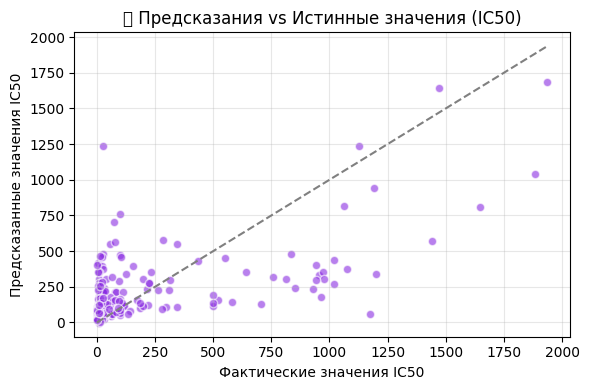

In [37]:
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# 🔹 1. Подготовка данных
target = 'IC50, mM'

X = df.drop(['Unnamed: 0', 'IC50, mM', 'CC50, mM', 'SI'], axis=1)
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=123
)

# 🔹 2. Модель и сетка параметров
hgb = HistGradientBoostingRegressor(random_state=123)

param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'max_iter': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'l2_regularization': [0.0, 0.1, 1.0]
}

grid_search = GridSearchCV(
    estimator=hgb,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=5,
    n_jobs=-1,
    verbose=2
)

# 🔹 3. Обучение и подбор
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_

# 🔹 4. Оценка на тестовой выборке
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# 🔹 5. Результаты
print("📌 Лучшие параметры:", grid_search.best_params_)
print("\n📊 Метрики модели (IC50):")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R²: {r2:.4f}")

# 🔹 6. Визуализация: предсказание vs реальность
plt.figure(figsize=(6, 4))
plt.scatter(y_test, y_pred, color='#8A2BE2', alpha=0.6, edgecolors='white')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='gray')
plt.xlabel('Фактические значения IC50')
plt.ylabel('Предсказанные значения IC50')
plt.title('🔬 Предсказания vs Истинные значения (IC50)')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


## **Результаты модели HistGradientBoosting для IC50**
* Лучшие параметры модели (после GridSearch):
* learning_rate = 0.05, max_iter = 100, max_depth = 5, l2_regularization = 0.1

* Метрики качества:

* MSE: 86467.36
* RMSE: 294.05
* MAE: 191.25
* R²: 0.3967

## **Интерпретация:**

* Модель объясняет около 40% дисперсии IC50, что указывает на умеренное качество предсказаний.

* Значения MAE и RMSE показывают, что в среднем ошибка прогноза составляет около 191–294 единиц IC50, что допустимо для предварительного анализа, но недостаточно для чувствительных биомедицинских решений.



**График:** **Предсказания** vs **Истинные значения** **IC50**
* Точки располагаются вокруг диагонали, но заметно рассеяны, особенно в области высоких значений — модель недооценивает экстремальные значения.

* Линия y = x (серая) указывает на идеальное совпадение предсказаний с реальностью — отклонения от неё иллюстрируют ошибки модели.

* Сгущение точек в области IC50 < 500 говорит о смещении распределения, возможны выбросы и асимметрия в данных.